In [2]:


import streamlit as st
import networkx as nx
from pyvis.network import Network
import pandas as pd
from streamlit.components.v1 import html


# Function to create a network graph
def create_network():
    G = nx.Graph()
    G.add_edges_from([
        ("A", "B"), 
        ("B", "C"), 
        ("A", "C"), 
        ("C", "D"), 
        ("D", "E"), 
        ("E", "A")
    ])
    
    # Use Pyvis to generate a network graph
    nt = Network("500px", "500px")
    nt.from_nx(G)
    return nt

# Streamlit layout
st.title('Network Analysis with Streamlit')

st.write ("Das Endziel dieses Skripts: Die User sollten die Möglichkeit haben, ihr persönliches Netz mit ausgewählten Komponenten zu erstellen.")

# Create network graph
network_graph = create_network()

# Generate HTML of the network graph
network_graph.save_graph("network.html")
HtmlFile = open("network.html", 'r', encoding='utf-8')
source_code = HtmlFile.read() 
html(source_code, height=500)


#"streamlit run app.py": run this in powershell (project directory)


2024-04-18 21:07:19.435 
  command:

    streamlit run c:\Users\janko\python\proj_1\.venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

    Unnamed: 0  user_id  sec_ema_a4  sec_c1  sec_c2  sec_c3  sec_ema_g3  \
0            1     2815           5     1.0     1.0     1.0         2.0   
1            2     2815           7     6.0     4.0     5.0         1.0   
2            3     2815           6     5.0     4.0     3.0         1.0   
3            4     2815           6     1.0     1.0     1.0         2.0   
4            5     2815           5     5.0     5.0     4.0         2.0   
5            6     2815           7     7.0     7.0     4.0         2.0   
6            7     2815           5     5.0     2.0     2.0         NaN   
7            8     2815           4     1.0     1.0     1.0         1.0   
8            9     2815           5     6.0     1.0     5.0         1.0   
9           10     2815           5     1.0     1.0     1.0         2.0   
10          11     2815           7     2.0     4.0     4.0         2.0   
11          12     2815           5     1.0     1.0     1.0         1.0   
12          13     2815  

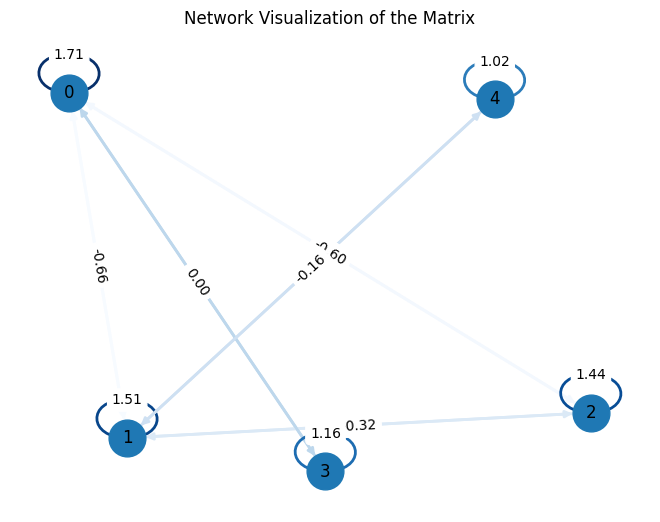

In [19]:
#here i want to try to load the ema data and create individual graphs. I think this is a good exercise to get a feeling for python
import pandas as pd
from pathlib import Path
import rpy2.robjects as robjects #with this code it would be possibel
from rpy2.robjects import pandas2ri
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

pandas2ri.activate()

#load data
path_to_data = Path('C:/Users/janko/python/data/net_for_pyt.csv')
df = pd.read_csv(path_to_data)

user_id = 2815

df_ind = df[df['user_id']==user_id]



# Assuming df is your DataFrame
# Display the column names
print(df_ind)

# Drop the first three columns by their names
df_ind_net = df_ind.drop(df_ind.columns[[0, 1, 2]], axis=1)

# Check the remaining DataFrame
print(df_ind_net.head())

robjects.globalenv['df_ind_net'] = df_ind_net  #define df as R dataframe

# Load an R package
robjects.r('''
library(graphicalVAR)
''')

result = robjects.r('''
graphicalVAR(df_ind_net, nLambda = 50, gamma = 0)
''')

matrix = result[1]


# Create a graph
G = nx.from_numpy_array(matrix, create_using=nx.DiGraph)

# Remove edges with weight zero for clarity in visualization
edges_to_remove = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] == 0]
G.remove_edges_from(edges_to_remove)

# Draw the network
pos = nx.spring_layout(G)  # positions for all nodes using a layout for better visibility
edges = G.edges(data=True)
weights = [d['weight'] for u, v, d in edges]

nx.draw(G, pos, with_labels=True, node_size=700, edge_color=weights, edge_cmap=plt.cm.Blues, width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in edges})
plt.title('Network Visualization of the Matrix')
#plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Blues), orientation='vertical')
plt.show()

